In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams.update({'font.size': 12})
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pickle
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.api as sm
import pylab
import scipy.stats as stats
import math
import json as j
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
from textblob import TextBlob
from sklearn.model_selection import KFold
%matplotlib inline


In [2]:
airbnb = pd.read_pickle('airbnb.pkl')

In [3]:
# clean the text from all the unnecessary characters

import re
def  clean_text(df, new_text_field1, new_text_field2):
    airbnb[new_text_field1] = airbnb['name'].str.lower()
    airbnb[new_text_field1] = airbnb[new_text_field1].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?|\w*\d\w*|[‘’“”…]|\n|", "", elem))  
    
    airbnb[new_text_field2] = airbnb['amenities'].str.lower()
    airbnb[new_text_field2] = airbnb[new_text_field2].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?|\w*\d\w*|[‘’“”…]|\n|", "", elem))  
    
    return df
data_clean = clean_text(airbnb, 'name_clean', 'amenities_clean')


In [6]:
#rename the dataframe and drop raw text data
cols_to_drop = ['name','amenities']
data_clean = data_clean.drop(cols_to_drop, axis=1)
airbnb = data_clean

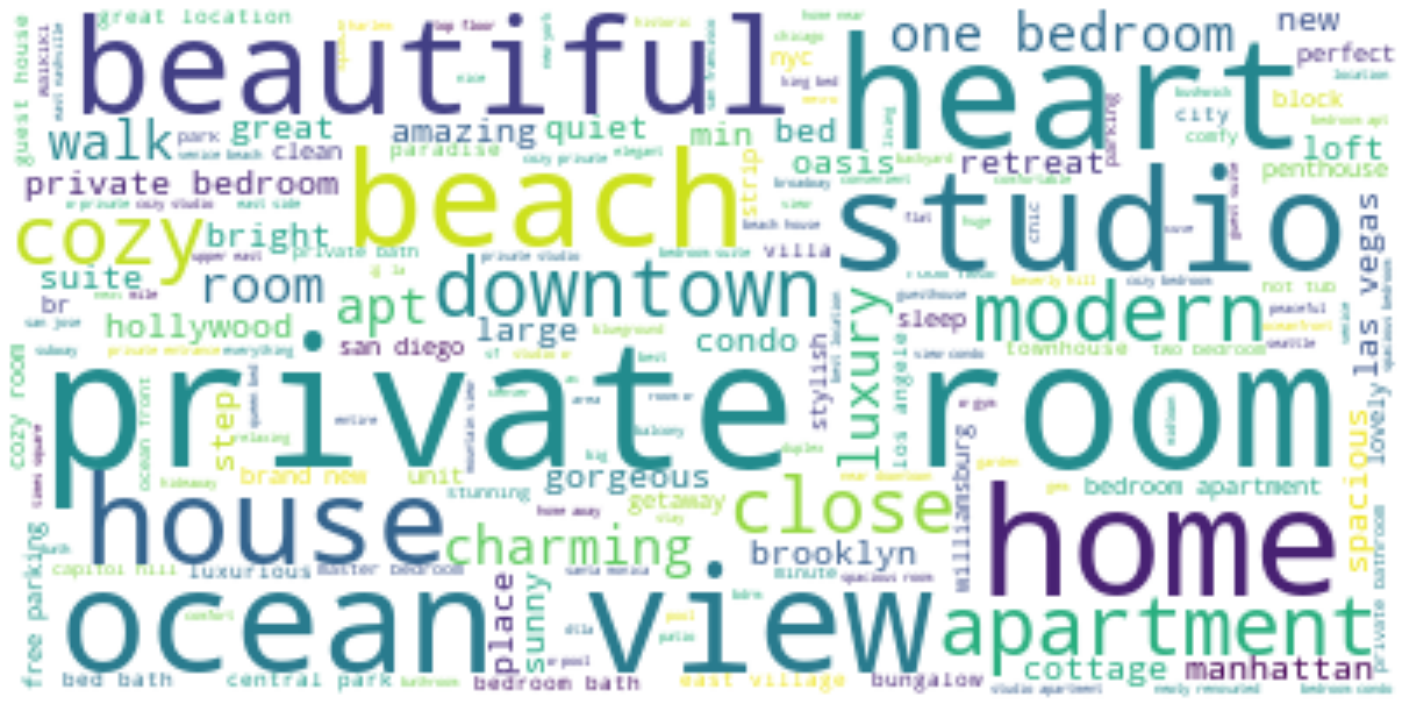

In [7]:
# here we can see the most used words in the listing name 

from wordcloud import WordCloud, ImageColorGenerator

text = ' '.join(str(n).lower() for n in airbnb.name_clean)

#Generate wordcloud image
wordcloud = WordCloud(max_words=200, background_color = 'white').generate(text)
plt.figure(figsize=(25,20))

#Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

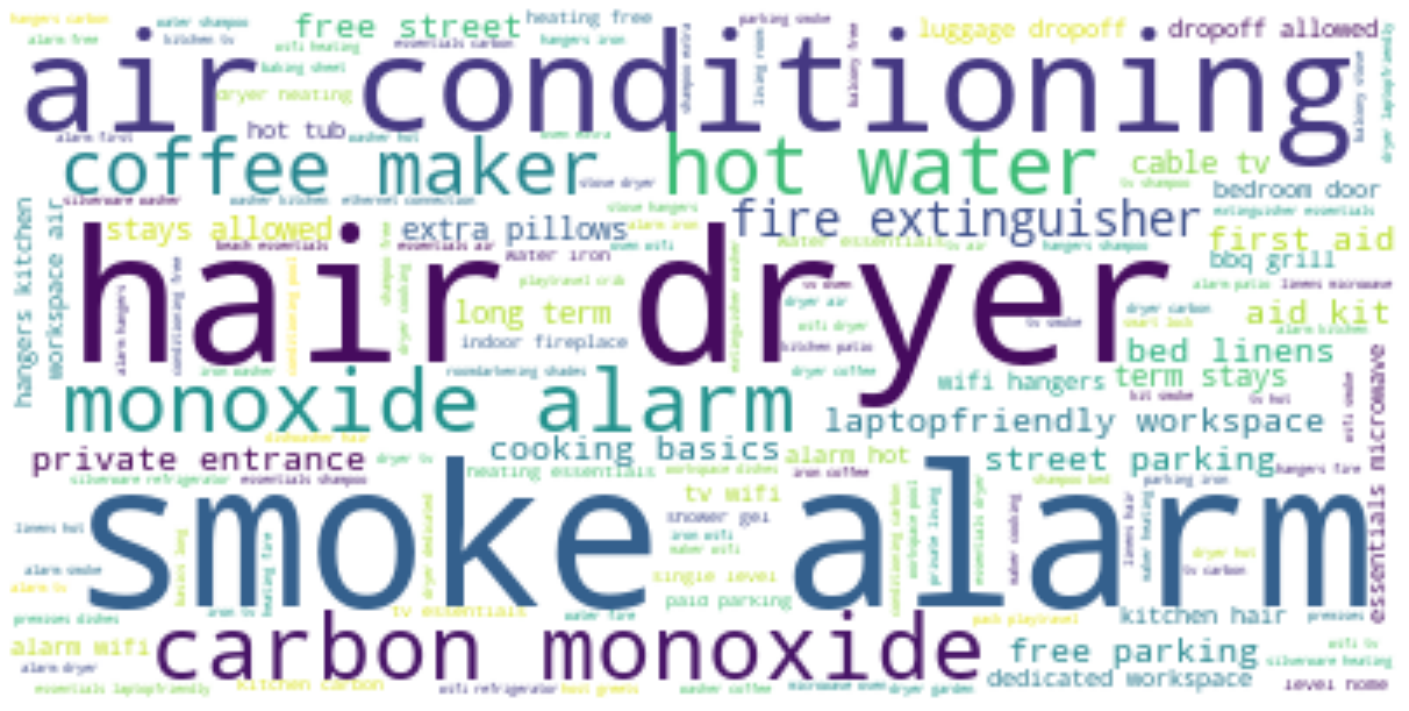

In [8]:
# here we can see the most used words in amenities listed 


from wordcloud import WordCloud, ImageColorGenerator

text = ' '.join(str(n).lower() for n in airbnb.amenities_clean)

#Generate wordcloud image
wordcloud = WordCloud(max_words=200, background_color = 'white').generate(text)
plt.figure(figsize=(25,20))

#Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [9]:
# Sentimental analysis

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

# Listing Name
airbnb['polarity1'] = airbnb['name_clean'].apply(pol)
airbnb['subjectivity1'] = airbnb['name_clean'].apply(sub)

# Amenities Listed
airbnb['polarity2'] = airbnb['amenities_clean'].apply(pol)
airbnb['subjectivity2'] = airbnb['amenities_clean'].apply(sub)

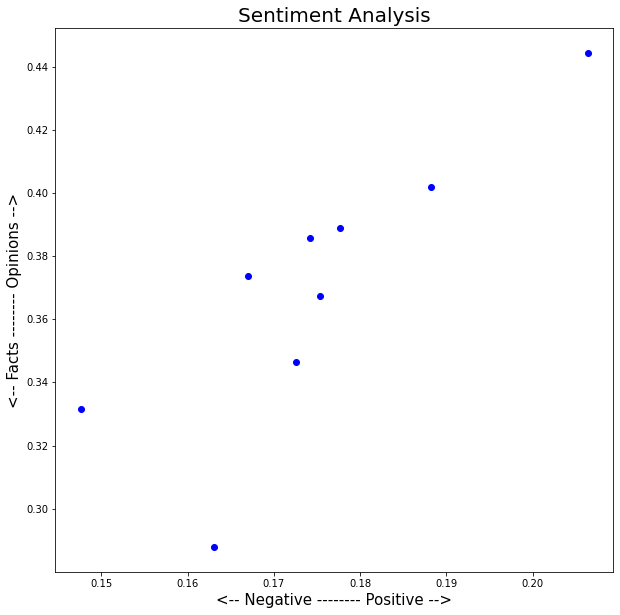

In [10]:
airbnb1 = airbnb.groupby('State').mean()

#plot sentiment analysis for a Listing Name

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

for index, State in enumerate(airbnb1.index):
    x = airbnb1.polarity1.loc[State]
    y = airbnb1.subjectivity1.loc[State]
    plt.scatter(x, y, color='blue')
   
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

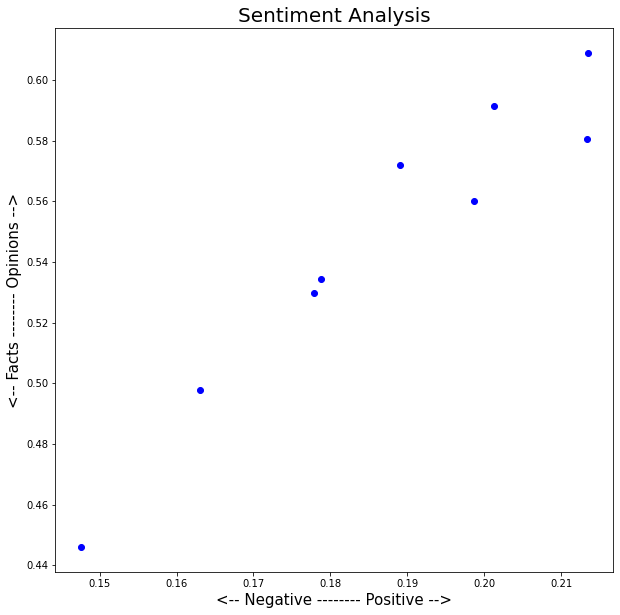

In [11]:
#plot sentiment analysis for amenities listed

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

for index, State in enumerate(airbnb1.index):
    x = airbnb1.polarity2.loc[State]
    y = airbnb1.subjectivity2.loc[State]
    plt.scatter(x, y, color='blue')
   
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [12]:
# Check if all the values are all positive

def ratio(x):
    if x > 0:
        return 1
    elif x == 0:  
        return(0)
    else:
        return(-1)
    
airbnb1['analysis1'] = airbnb1['polarity1'].apply(ratio)
airbnb1['analysis2'] = airbnb1['polarity2'].apply(ratio)

# Graph them
#airbnb1['analysis1'].value_counts().plot(kind = 'bar')
#airbnb1['analysis2'].value_counts().plot(kind = 'bar')

In [13]:
airbnb.to_pickle("clean_data.pkl")